In [268]:
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import glob

In [269]:
def extract(df):
    in_flocks = []
    angles = []
    
    for frame in range(max(df["frame"])):
        in_flocks.append(df["image_index"][(df["frame"]==frame) & (df["image_index"]==1)].count())

        angle = np.array(list(df["angle"][df["frame"]==frame])).reshape(-1, 1)
        angles.append(angle)
        
    return in_flocks, angles


def extract_cluster(df):
    clusters = []
    
    for frame in tqdm(range(max(df["frame"]))):
        scores = []
        ds = df[["x","y"]][df["frame"]==frame].to_numpy()
        for k in range(2, 50):
            model = KMeans(n_clusters=k)
            model.fit(ds)
            pred = model.predict(ds)
            scores.append(silhouette_score(ds, pred))
        clusters.append(np.argmax(scores)+2)
        
    return clusters



In [274]:
def plot_flock_p(in_flocks, name,r = 600):
    fig, ax = plt.subplots()

    #ax.vlines(162,-1,2,colors = "r")
    #ax.vlines(337,-1,2,colors = "r")
    #ax.vlines(446,-1,2,colors = "r")

    ax.plot(range(r),[x/50 for x in in_flocks])

    ax.set_title("Percentage of Birds in a Flock over Time")
    ax.set_ylabel("Percentahe of birds in a flock")
    ax.set_xlabel("Frame")
    plt.ylim([0,1])
    
    plt.savefig(f"plots/flock_{name}.png")

In [271]:
def moving_average(x, n=10, or_dim = 600) :
    ret = np.cumsum(x, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    add = 600-len(ret[n - 1:]) if len(ret[n - 1:])<or_dim else 0
    ins = [0]*add
    fin = np.concatenate((np.array(ins),ret[n - 1:]),axis = None)
    return fin / n

In [272]:
def plot_cluster(clusters,r = 600):
    
    fig, ax = plt.subplots()
    m = max(clusters)
    #ax.vlines(162,-2,m+2,colors = "r")
    #ax.vlines(337,-1,m+2,colors = "r")
    #ax.vlines(446,-1,m+2,colors = "r")


    
    ax.plot(range(r),moving_average(np.array(clusters),n = 60) ,color = "g")
    ax.plot(range(r),moving_average(np.array(clusters)), color = "purple")
    ax.plot(range(r),np.array(clusters))
    
    ax.set_title("Clusters per Frame")
    ax.set_ylabel("Amount of Clusters")
    ax.set_xlabel("Frame")

    plt.ylim([2,m])
    plt.savefig(f"plots/cluster_{name}.png")


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:06<00:00,  1.95it/s]


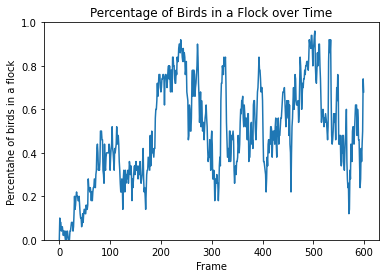

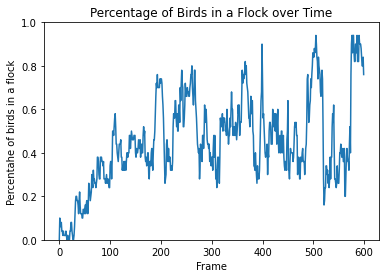

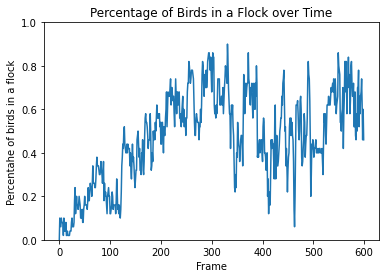

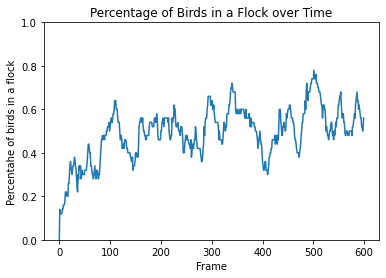

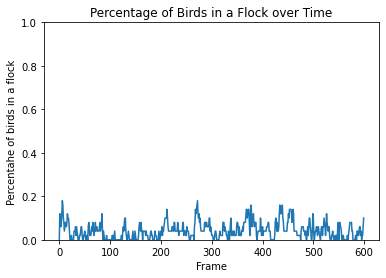

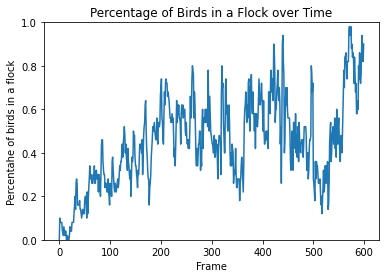

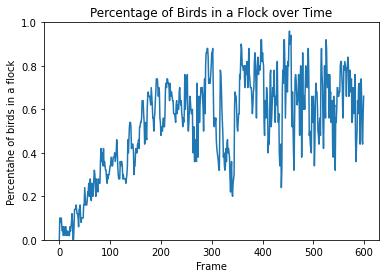

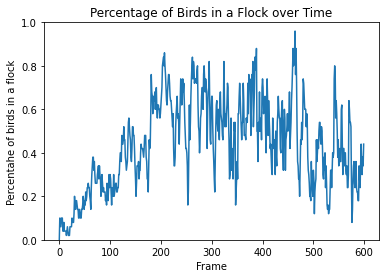

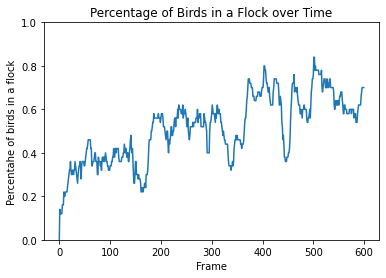

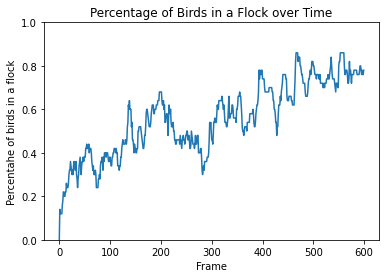

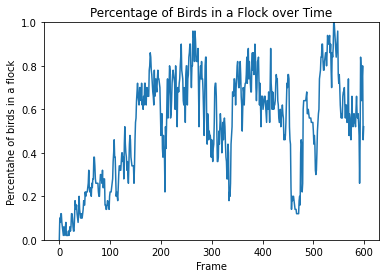

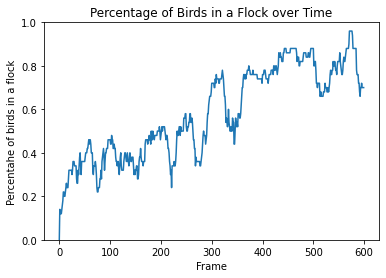

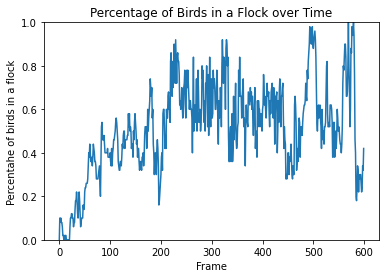

In [273]:
experiments = glob.glob("Experiments/*.csv")
score = []
for ex in tqdm(experiments):
    name = ex[12:-4]
    df = pd.read_csv(ex)
    
    in_flocks, angles = extract(df)
    score.append(np.average(in_flocks))
    plot_flock_p(in_flocks, name,max(df["frame"]))
print(score)
    
i = np.argmax(score)

clusters = extract_cluster()
plot_cluster(experiments[i])
    
    